In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tqdm

In [2]:
file = open('./data/shashlik_61_pulses.txt', 'r')
data = file.readlines()
data = np.array([list(map(float, experiment.split())) for experiment in data])

In [3]:
data.shape

(7848, 1026)

In [4]:
print("Experiments number:", data.shape[0])

Experiments number: 7848


In [5]:
y = data[:, 0]
y_baseline = data[:, 1]
X = data[:, 2:]

### Normalize y

In [7]:
y = y - np.mean(y)

In [8]:
y_baseline = y_baseline - np.mean(y_baseline)

### Model

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [9]:
def print_lr_scores(X):
    reg = LinearRegression()
    
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
    scores = cross_validate(reg, X, y, scoring=scoring, cv=5)
    
    print("95% confindence interval:")
    print("r2_score: %0.5f (+/- %0.5f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
    print("MSE: %0.5f (+/- %0.5f)" % (-scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std() * 2))
    print("MAE: %0.5f (+/- %0.5f)" % (-scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))

#### Linear regression metrics

In [11]:
print_lr_scores(X)

95% confindence interval:
r2_score: 0.99904 (+/- 0.00008)
MSE: 0.15693 (+/- 0.01474)
MAE: 0.30628 (+/- 0.01495)


#### Baseline metrics

In [12]:
print("r2_score:", r2_score(y, y_baseline))
print("MSE:", mean_squared_error(y, y_baseline))
print("MAE:", mean_absolute_error(y, y_baseline))

r2_score: 0.9994485733281531
MSE: 0.08974125778045815
MAE: 0.23497220510936273


### Let's plot errors distribution

##### Train-test split

In [13]:
X_train, X_test, y_train, y_test, y_baseline_train, y_baseline_test = train_test_split(X, y, y_baseline, test_size=0.33, random_state=42)

In [14]:
reg = LinearRegression().fit(X_train, y_train)

In [15]:
predicted = reg.predict(X_test)

In [16]:
regression_diff = predicted - y_test

(array([  7.,  34.,  91., 372., 768., 795., 412.,  85.,  21.,   5.]),
 array([-1.57727910e+00, -1.26177112e+00, -9.46263135e-01, -6.30755154e-01,
        -3.15247174e-01,  2.60806924e-04,  3.15768788e-01,  6.31276768e-01,
         9.46784749e-01,  1.26229273e+00,  1.57780071e+00]),
 <a list of 10 Patch objects>)

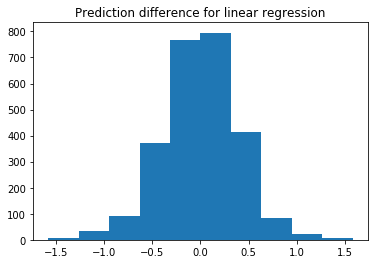

In [17]:
plt.title("Prediction difference for linear regression")
plt.hist(regression_diff)

In [18]:
baseline_diff = y_baseline_test - y_test

(array([  8.,  14.,  61., 225., 547., 801., 659., 242.,  30.,   3.]),
 array([-1.28271267, -1.04751267, -0.81231267, -0.57711267, -0.34191267,
        -0.10671267,  0.12848733,  0.36368733,  0.59888733,  0.83408733,
         1.06928733]),
 <a list of 10 Patch objects>)

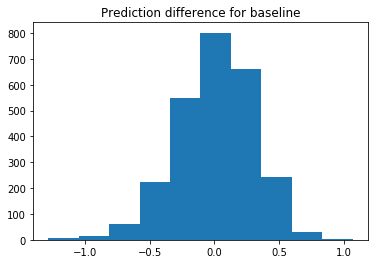

In [19]:
plt.title("Prediction difference for baseline")
plt.hist(baseline_diff)

### Test

In [20]:
freq = 390

In [22]:
X_freq = X[:, ::freq]
print_lr_scores(X_freq)

95% confindence interval:
r2_score: 0.11110 (+/- 0.03837)
MSE: 144.66644 (+/- 13.81257)
MAE: 9.81579 (+/- 0.34574)


In [24]:
np.log(X_freq[:, 1])

array([7.13352737, 7.2056723 , 7.0518816 , ..., 7.24699511, 7.08905131,
       7.13737382])

In [25]:
X_freq[:, 1] = np.log(X_freq[:, 1])

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(X_freq, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
np.array(reg.coef_) 

array([  0.14498711, -51.77390827,  -0.06986358])

(array([  73.,  376.,  917., 1374., 1564., 2099.,  900.,  422.,  103.,
          20.]),
 array([2661. , 2663.2, 2665.4, 2667.6, 2669.8, 2672. , 2674.2, 2676.4,
        2678.6, 2680.8, 2683. ]),
 <a list of 10 Patch objects>)

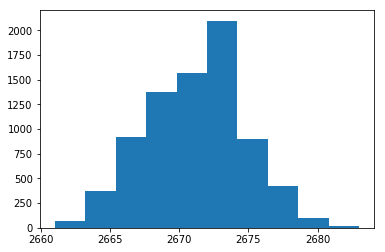

In [31]:
plt.hist(X_freq[:, 0])

(array([ 124., 1125., 2072., 1599., 1133.,  917.,  573.,  238.,   59.,
           8.]),
 array([6.92450423, 6.97389409, 7.02328396, 7.07267383, 7.12206369,
        7.17145356, 7.22084342, 7.27023329, 7.31962316, 7.36901302,
        7.41840289]),
 <a list of 10 Patch objects>)

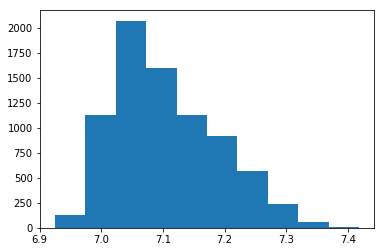

In [35]:
plt.hist(X_freq[:, 1])

(array([  25.,  196.,  761., 1348., 1606., 1767., 1231.,  698.,  185.,
          31.]),
 array([2659.24 , 2661.376, 2663.512, 2665.648, 2667.784, 2669.92 ,
        2672.056, 2674.192, 2676.328, 2678.464, 2680.6  ]),
 <a list of 10 Patch objects>)

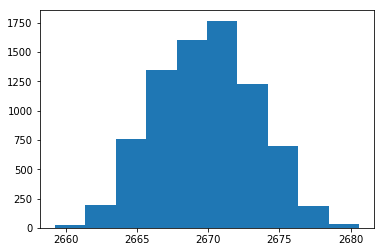

In [32]:
plt.hist(X_freq[:, 2])

(array([ 102.,  515.,  998., 1123., 1050., 1073., 1044., 1037.,  714.,
         192.]), array([-29.70791514, -23.92501514, -18.14211514, -12.35921514,
         -6.57631514,  -0.79341514,   4.98948486,  10.77238486,
         16.55528486,  22.33818486,  28.12108486]), <a list of 10 Patch objects>)

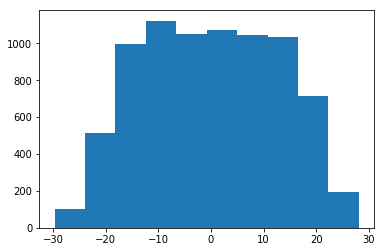

In [33]:
plt.hist(y)

(array([   9.,   61.,  248.,  570.,  902., 1128., 1608., 2041., 1134.,
         147.]), array([-16.07708765, -13.54041435, -11.00374105,  -8.46706774,
         -5.93039444,  -3.39372114,  -0.85704784,   1.67962546,
          4.21629877,   6.75297207,   9.28964537]), <a list of 10 Patch objects>)

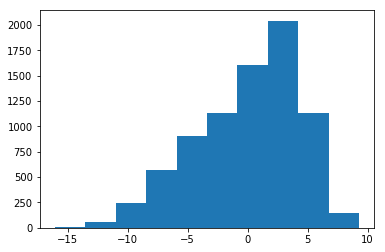

In [34]:
plt.hist(reg.predict(X_freq))

(array([ 124., 1125., 2072., 1599., 1133.,  917.,  573.,  238.,   59.,
           8.]),
 array([6.92450423, 6.97389409, 7.02328396, 7.07267383, 7.12206369,
        7.17145356, 7.22084342, 7.27023329, 7.31962316, 7.36901302,
        7.41840289]),
 <a list of 10 Patch objects>)

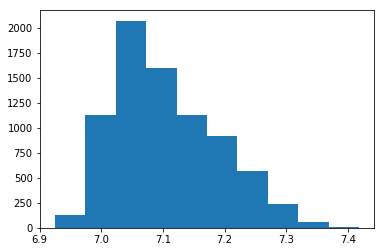

In [30]:
plt.hist(X_freq[:, 1])

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [57]:
reg.fit(X_freq_transformed, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_pred = reg.predict(X_freq_transformed)

In [61]:
reg.coef_

array([ 0.50710309, -4.28609041, -0.22954827])

In [62]:
y_pred

array([-6.81302785e-03, -5.40204031e+00,  2.82989805e+00, ...,
       -7.39342492e+00,  1.07484338e+00, -6.94594895e-01])

(array([   4.,   29.,  127.,  358.,  687.,  977., 1397., 2128., 1853.,
         288.]), array([-18.06555102, -15.42058149, -12.77561196, -10.13064243,
         -7.4856729 ,  -4.84070337,  -2.19573384,   0.44923569,
          3.09420522,   5.73917475,   8.38414428]), <a list of 10 Patch objects>)

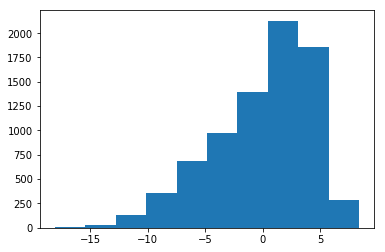

In [64]:
plt.hist(y_pred)

(array([ 102.,  515.,  998., 1123., 1050., 1073., 1044., 1037.,  714.,
         192.]), array([-29.70791514, -23.92501514, -18.14211514, -12.35921514,
         -6.57631514,  -0.79341514,   4.98948486,  10.77238486,
         16.55528486,  22.33818486,  28.12108486]), <a list of 10 Patch objects>)

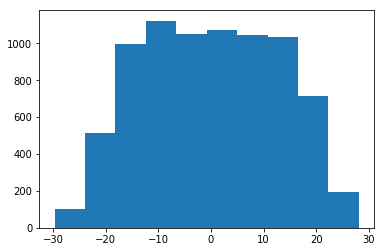

In [65]:
plt.hist(y)

In [60]:
r2_score(y_pred, y)

-6.878390049423042

### Experiments with signal frequency

In [19]:
frequency_values = range(2, 1000)

In [20]:
r2_scores = []
mse_scores = []
mae_scores = []

for freq in tqdm.tqdm(frequency_values):
    X_freq = X[:, ::freq]
    
    reg = LinearRegression()
    
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
    scores = cross_validate(reg, X_freq, y, scoring=scoring, cv=5)
    
    r2_scores.append(scores['test_r2'].mean())
    mse_scores.append(scores['test_neg_mean_squared_error'].mean())
    mae_scores.append(scores['test_neg_mean_absolute_error'].mean())

100%|██████████| 998/998 [00:42<00:00, 23.48it/s]


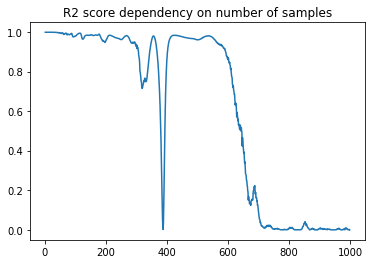

In [21]:
plt.title("R2 score dependency on number of samples")
plt.plot(frequency_values, r2_scores)
plt.show()

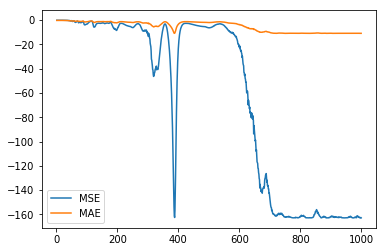

In [22]:
plt.plot("MSE and MAE dependencies on number of samples")
plt.plot(frequency_values, mse_scores)
plt.plot(frequency_values, mae_scores)
plt.legend(('MSE', 'MAE'),
           loc='lower left')
plt.show()

### Impuls graphs for different signal frequencies

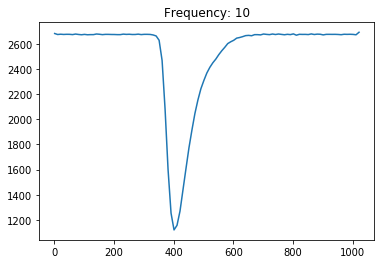

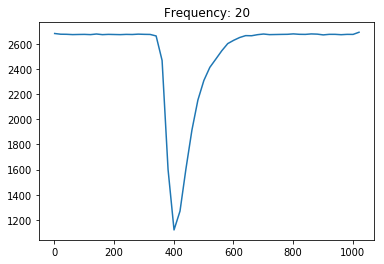

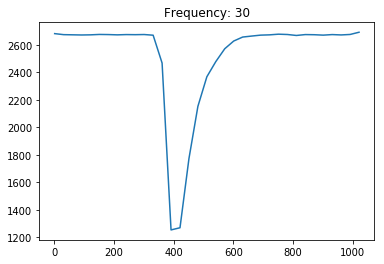

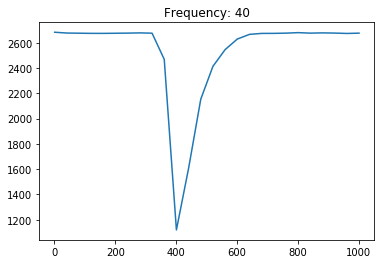

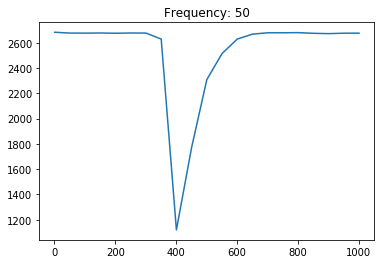

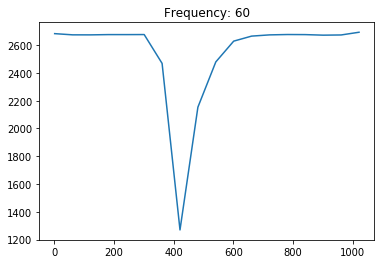

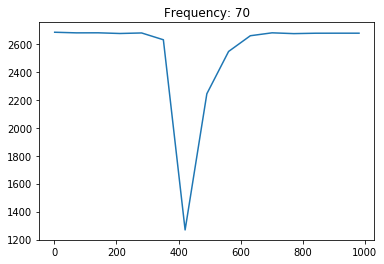

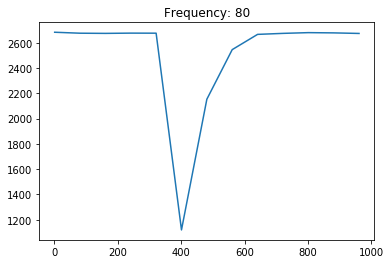

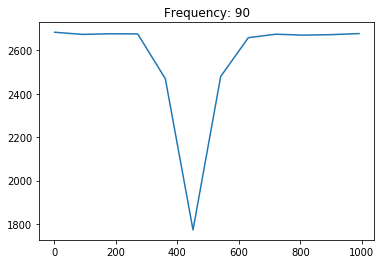

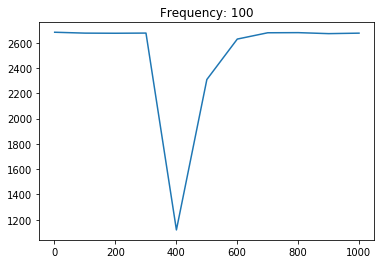

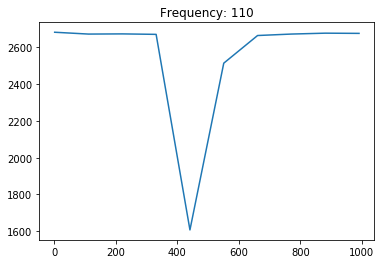

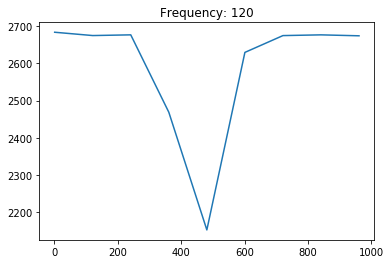

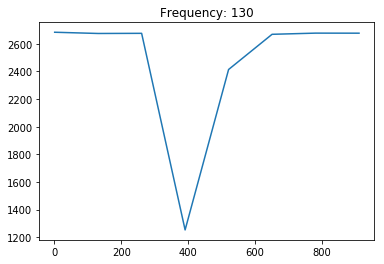

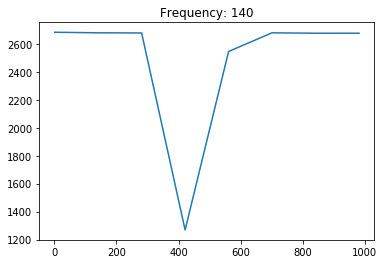

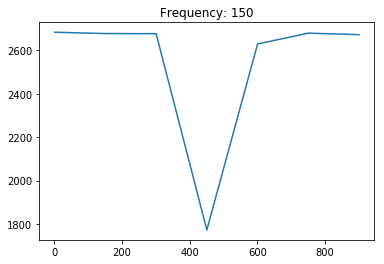

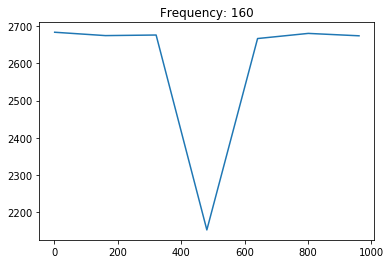

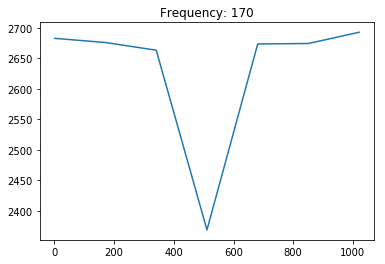

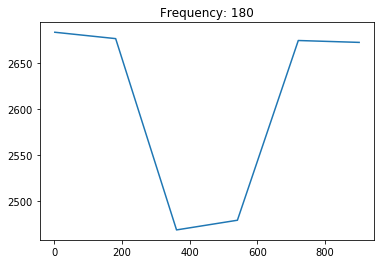

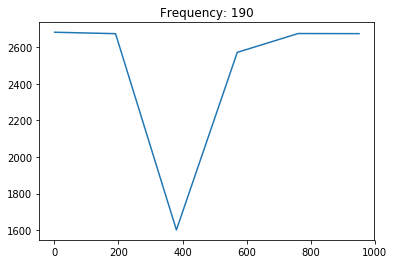

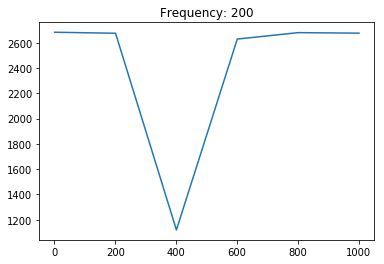

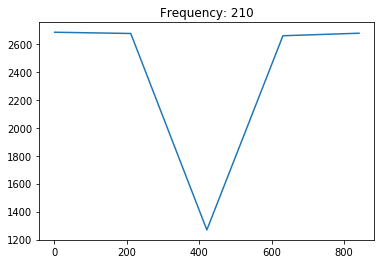

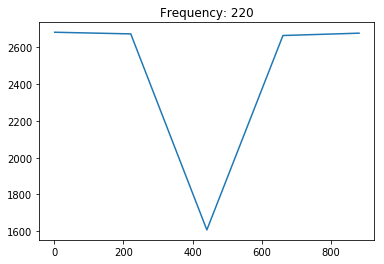

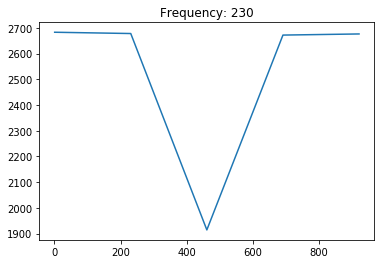

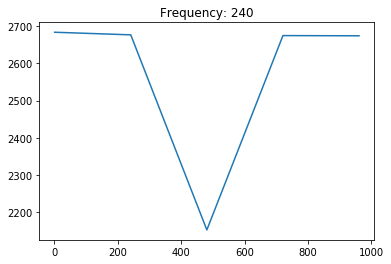

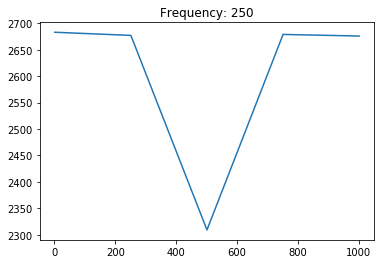

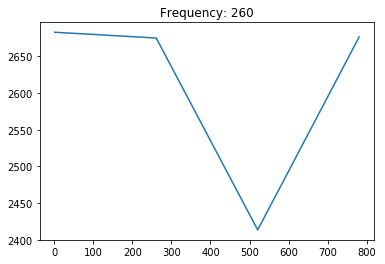

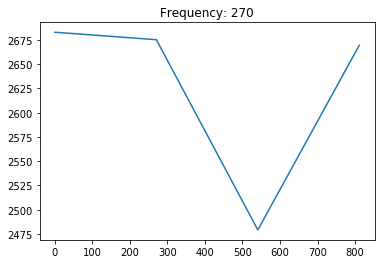

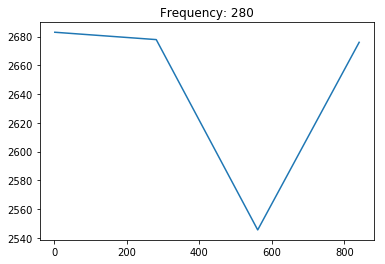

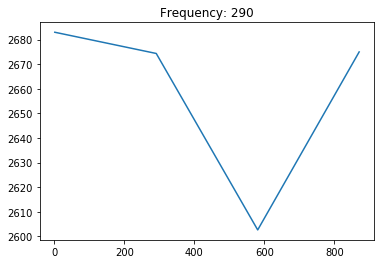

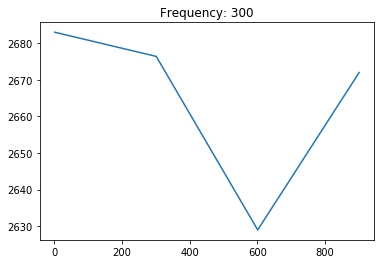

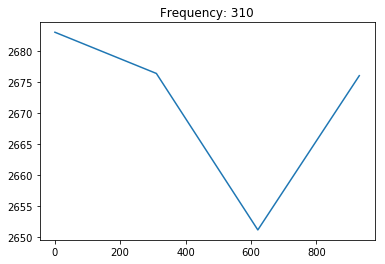

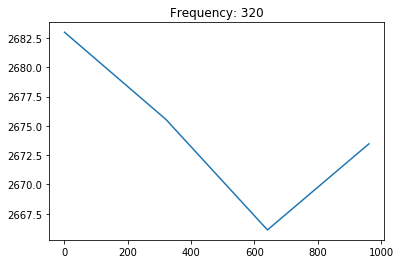

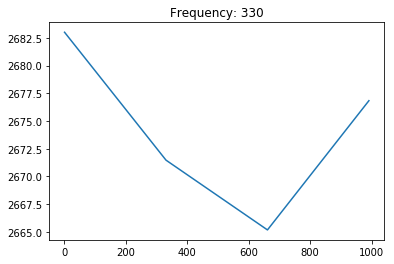

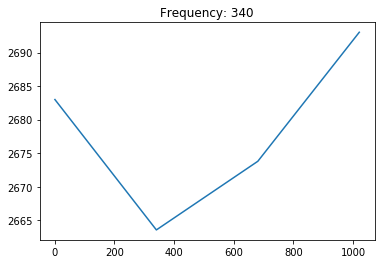

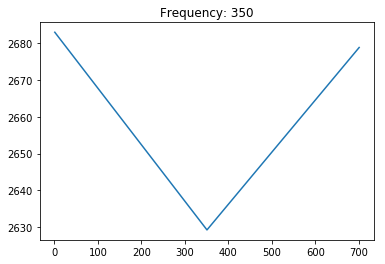

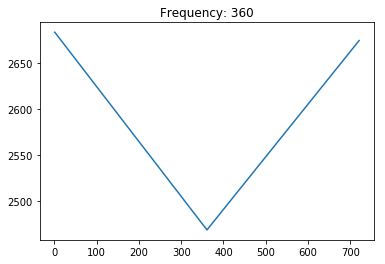

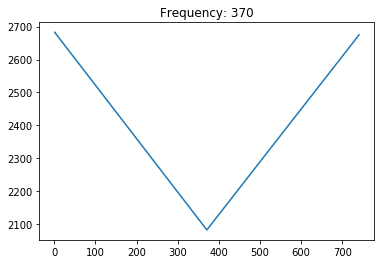

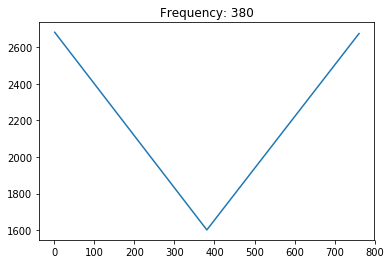

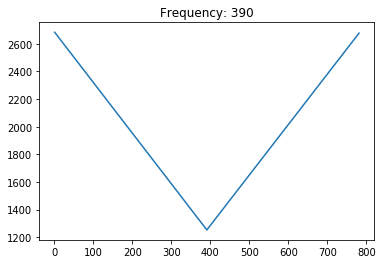

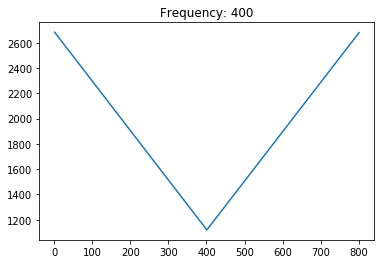

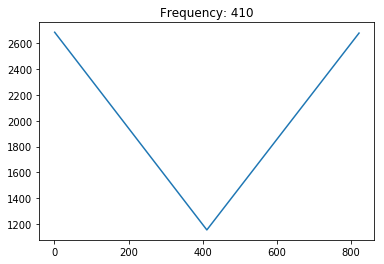

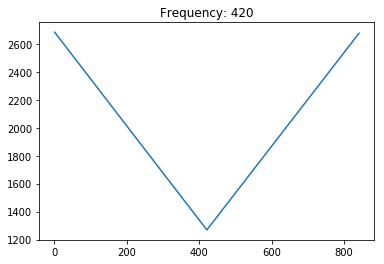

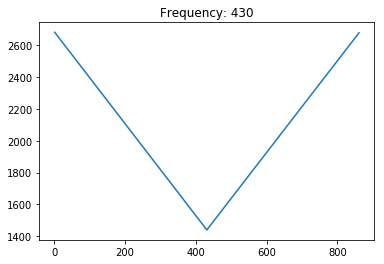

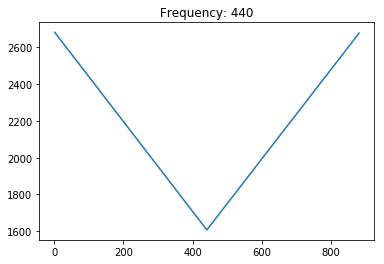

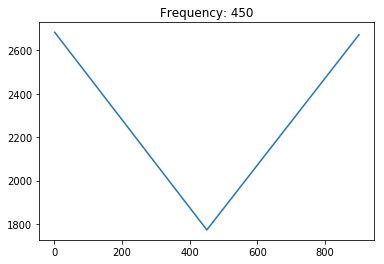

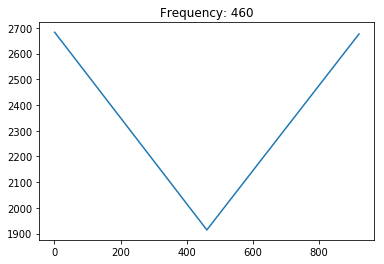

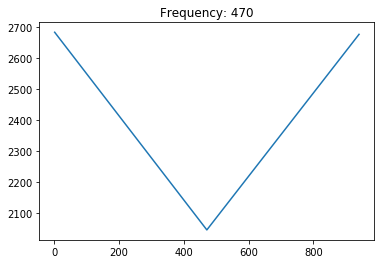

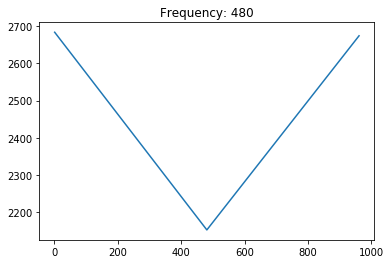

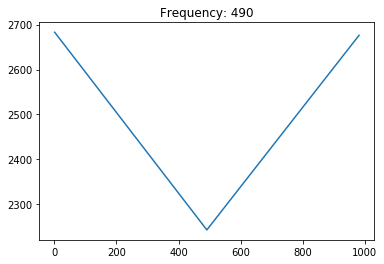

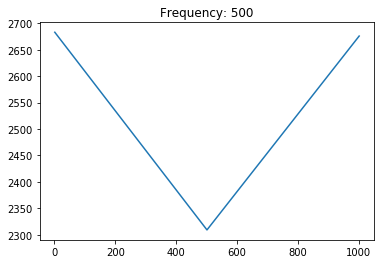

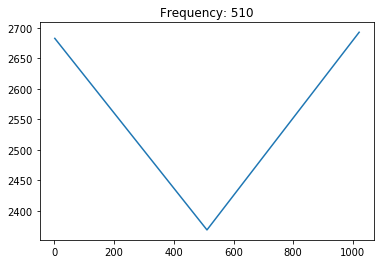

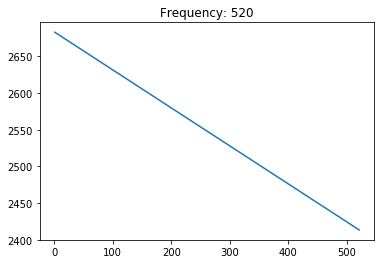

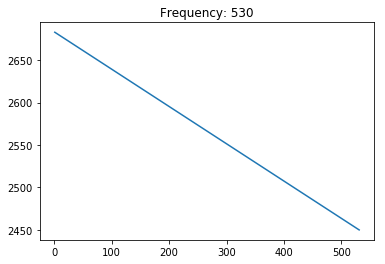

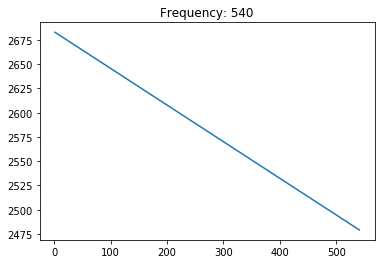

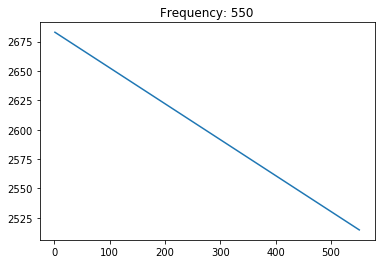

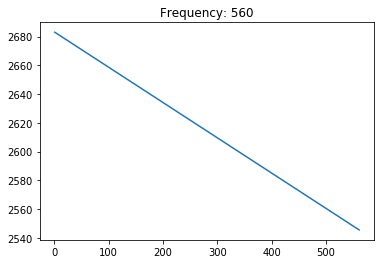

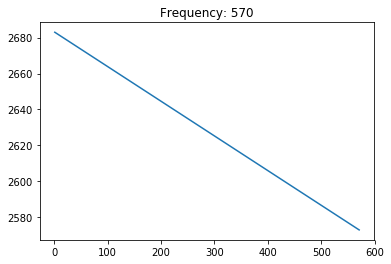

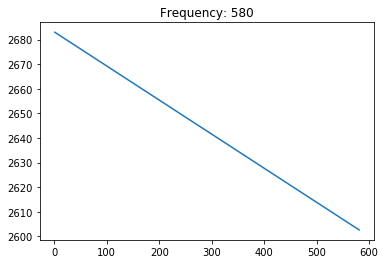

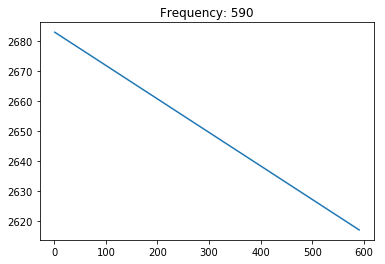

In [30]:
for freq in range(10, 600, 10):
    x = X[0, ::freq]

    plt.title("Frequency: " + str(freq))
    plt.plot(range(1, len(X[0]), freq), x)
    plt.show()

### Graphs

(array([ 33., 177., 330., 361., 359., 361., 330., 345., 229.,  65.]),
 array([-29.70791514, -23.98461514, -18.26131514, -12.53801514,
         -6.81471514,  -1.09141514,   4.63188486,  10.35518486,
         16.07848486,  21.80178486,  27.52508486]),
 <a list of 10 Patch objects>)

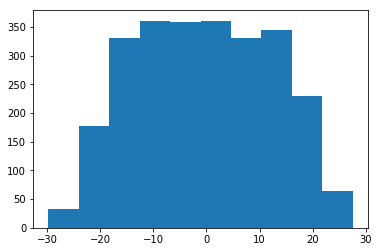

In [58]:
plt.hist(y_test)

In [59]:
def plot_experiment(num):
    experiment = X[num]
    plt.plot(experiment)
    plt.show()

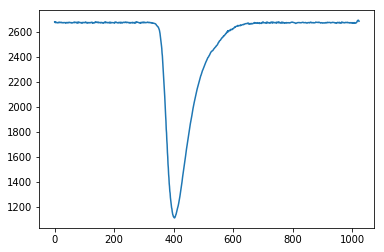

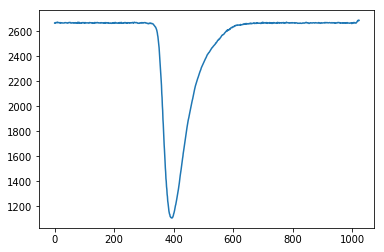

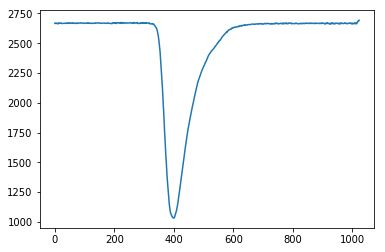

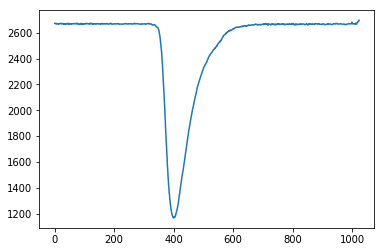

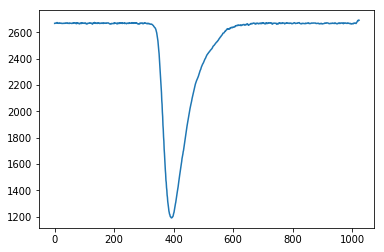

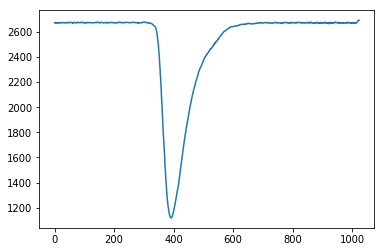

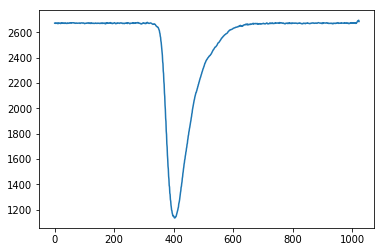

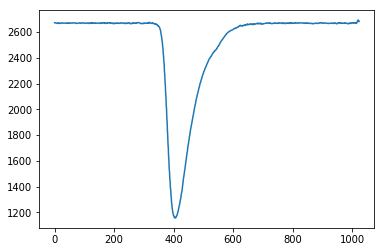

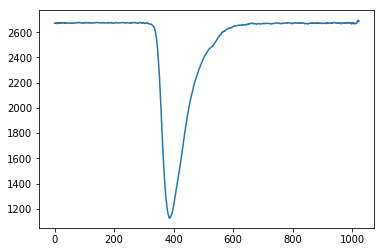

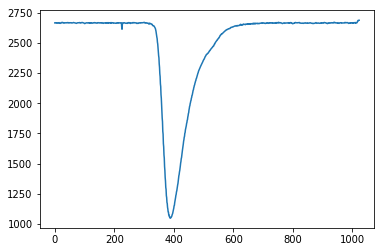

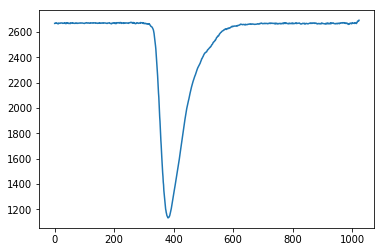

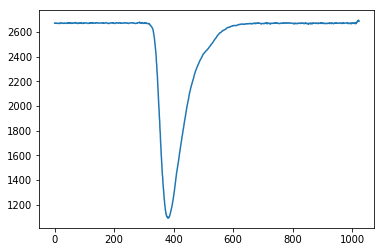

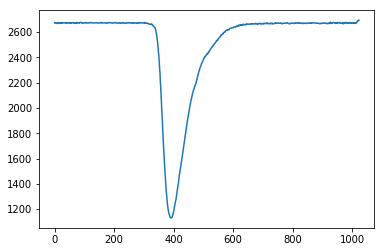

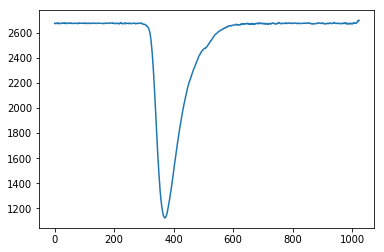

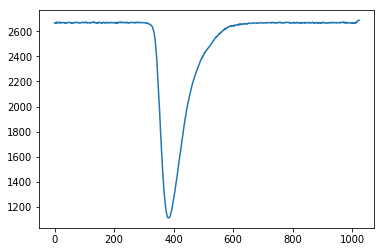

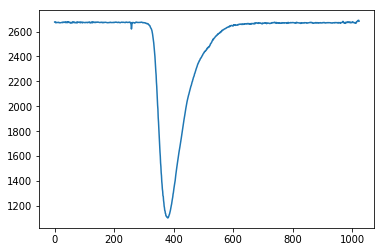

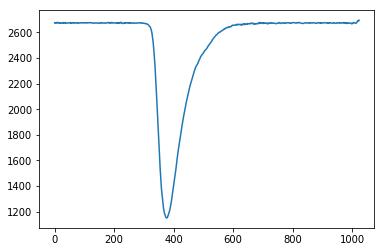

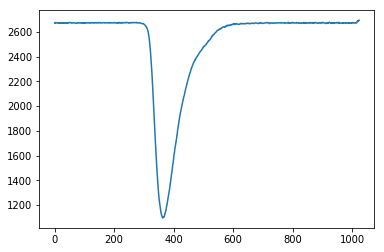

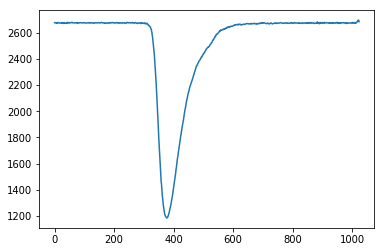

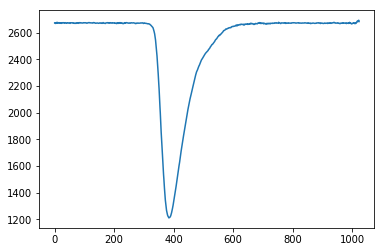

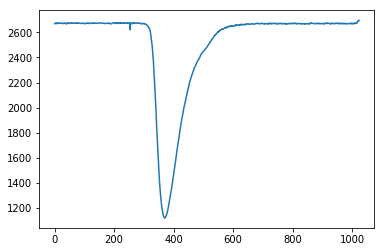

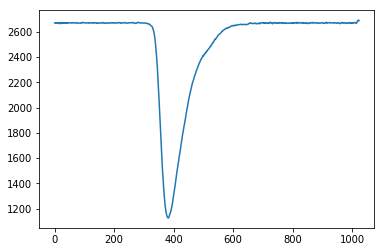

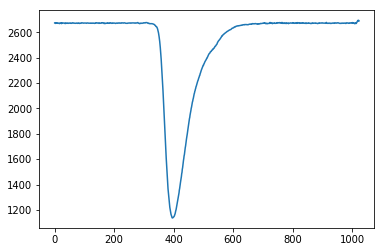

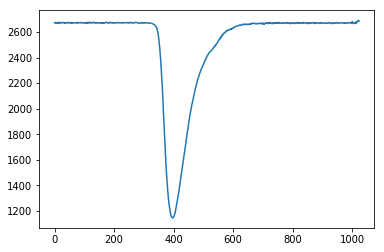

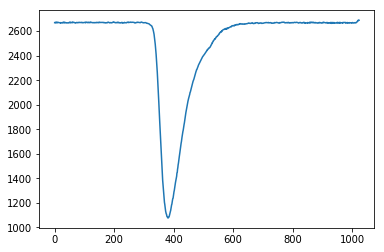

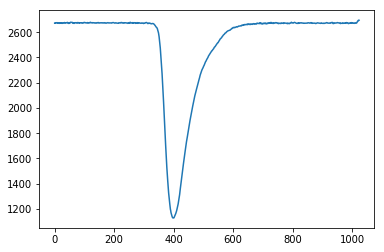

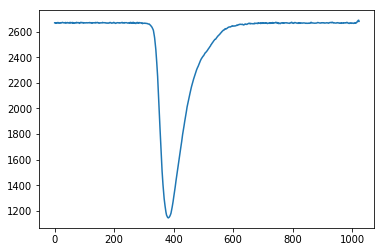

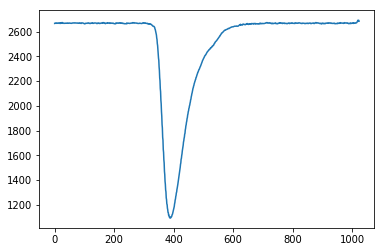

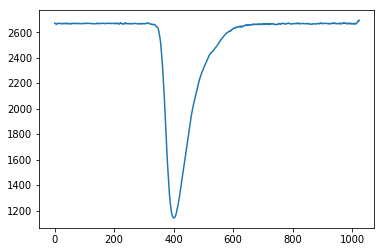

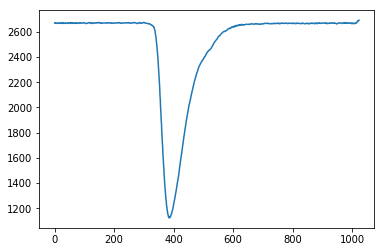

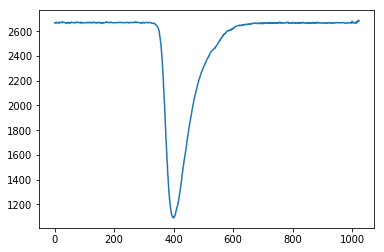

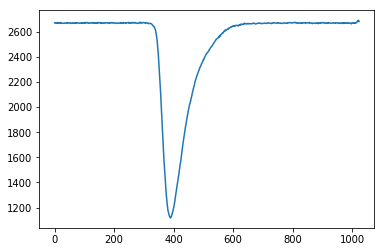

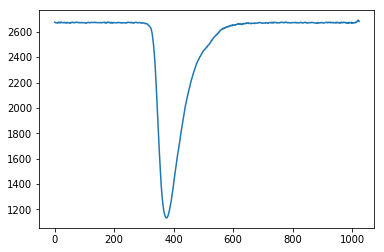

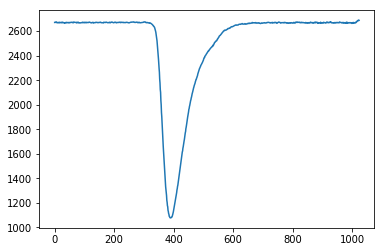

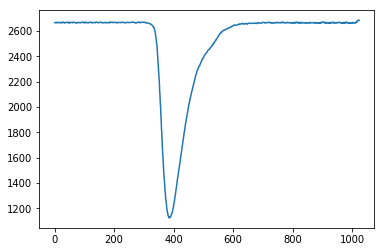

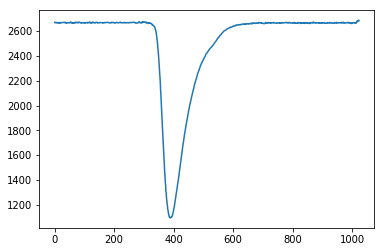

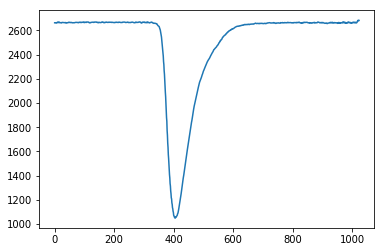

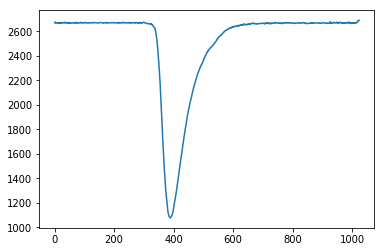

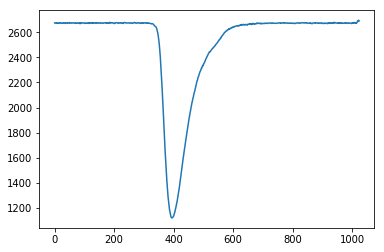

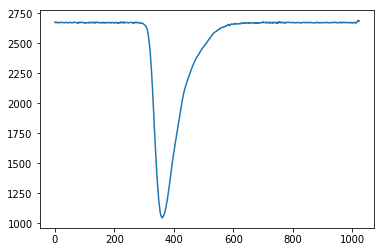

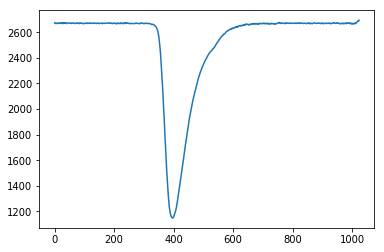

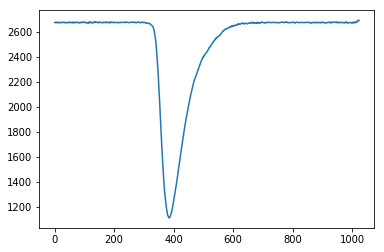

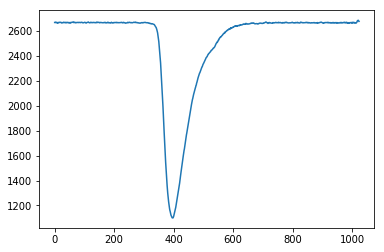

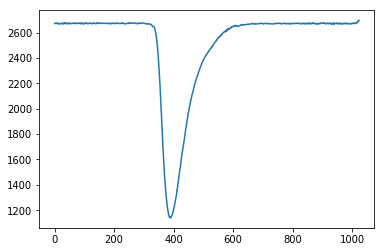

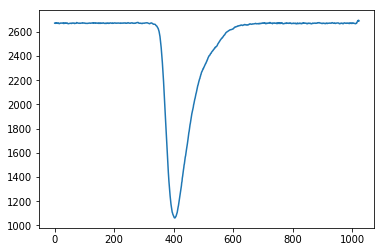

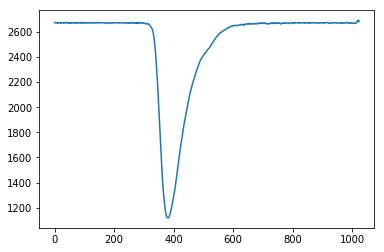

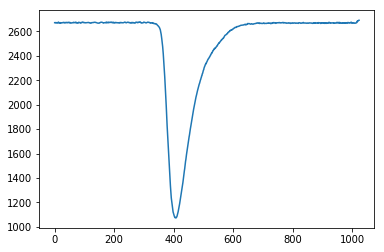

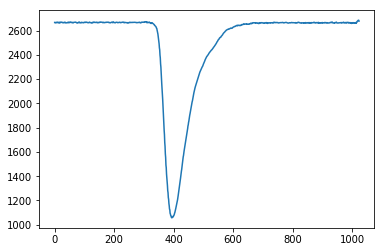

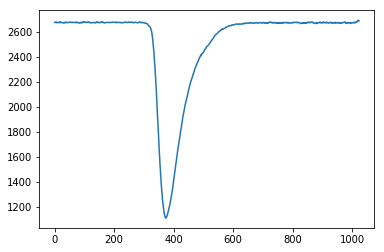

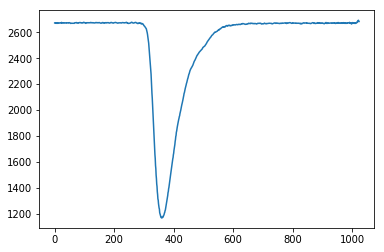

In [60]:
for i in range(0, 5000, 100):
    plot_experiment(i)